In [1]:
!wget https://raw.githubusercontent.com/chelvanai/LSTM_Forecast/main/airline-passengers.csv

--2022-09-08 04:01:41--  https://raw.githubusercontent.com/chelvanai/LSTM_Forecast/main/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2022-09-08 04:01:41 (39.7 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



In [11]:
!pip install -q catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [12]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('airline-passengers.csv')

In [14]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [15]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i:(i + seq_length)]
        _y = data[i + seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x), np.array(y)

In [20]:
train = df.Passengers.values[:-4]

In [25]:
seq_length = 5

x, y = sliding_windows(train, seq_length)

In [26]:
x.shape, y.shape

((135, 5), (135,))

In [27]:
model = CatBoostRegressor()

In [28]:
model.fit(x, y)

Learning rate set to 0.029838
0:	learn: 113.5419209	total: 4.83ms	remaining: 4.82s
1:	learn: 111.0972790	total: 6.17ms	remaining: 3.08s
2:	learn: 108.6992053	total: 8.48ms	remaining: 2.82s
3:	learn: 106.4724449	total: 9.62ms	remaining: 2.4s
4:	learn: 104.4916646	total: 10.7ms	remaining: 2.13s
5:	learn: 102.3664899	total: 11.7ms	remaining: 1.95s
6:	learn: 100.4033037	total: 12.8ms	remaining: 1.81s
7:	learn: 98.3566765	total: 13.8ms	remaining: 1.71s
8:	learn: 96.5043333	total: 14.8ms	remaining: 1.63s
9:	learn: 94.6111423	total: 15.9ms	remaining: 1.57s
10:	learn: 92.8016474	total: 16.9ms	remaining: 1.52s
11:	learn: 91.0520265	total: 18ms	remaining: 1.48s
12:	learn: 89.4682944	total: 19ms	remaining: 1.44s
13:	learn: 87.7807367	total: 20ms	remaining: 1.41s
14:	learn: 85.9987282	total: 21ms	remaining: 1.38s
15:	learn: 84.3484712	total: 22ms	remaining: 1.35s
16:	learn: 82.8073769	total: 23.1ms	remaining: 1.33s
17:	learn: 81.2264174	total: 24.1ms	remaining: 1.31s
18:	learn: 79.6967615	total: 2

In [33]:
res = []
data = train.tolist()

for i in range(0, 4):
  test = np.array(data[-seq_length:])
  predict = model.predict(np.expand_dims(test, axis=0))
  res.append(predict.item())
  data.append(predict.tolist()[0])

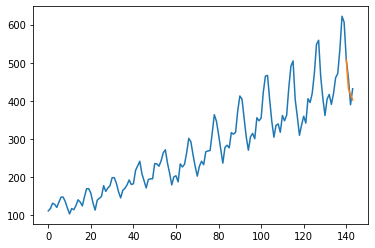

In [34]:
plt.plot(df.Passengers.values)
plt.plot(np.arange(len(train), len(train) + 4), res)
plt.show()

In [36]:
before = np.empty(len(df[:-4]))
before[:] = np.nan
pred_result = np.concatenate((before, np.array(res)), axis=0)
result = pd.Series(pred_result, name="Predicted")
result = result.apply(lambda x: round(x, 2))

In [38]:
df['Predicted'] = result.to_list()
df['difference'] = round(df['Passengers'] - df['Predicted'], 2)
df['error-percentage'] = (df['difference'] / df['Passengers']) * 100
df['error-percentage'] = df['error-percentage'].apply(lambda x: round(x, 2))

In [39]:
df.tail(10)

,Month,Passengers,Predicted,difference,error-percentage
134,1960-03,419,NaN,NaN,NaN
135,1960-04,461,NaN,NaN,NaN
136,1960-05,472,NaN,NaN,NaN
137,1960-06,535,NaN,NaN,NaN
138,1960-07,622,NaN,NaN,NaN
139,1960-08,606,NaN,NaN,NaN
140,1960-09,508,507.86,0.14,0.03
141,1960-10,461,433.02,27.98,6.07
142,1960-11,390,416.71,-26.71,-6.85
143,1960-12,432,402.66,29.34,6.79
